In [2]:
!pip install kaggle
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d juhi1994/superstore
!unzip superstore.zip

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes
Dataset URL: https://www.kaggle.com/datasets/juhi1994/superstore
License(s): unknown
superstore.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('US Superstore data.xls')
print(df.head())

df.info()
df.isnull().sum()
duplicated = df.duplicated(keep='first')
print(duplicated[duplicated == True])
df.drop_duplicates(inplace=True)
df.isnull().sum()

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [6]:
!pip install plotly==5.13.1
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [24]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Sales'] = pd.to_numeric(df['Sales'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df_monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

fig_line = px.line(df_monthly_sales, x='Month', y='Sales', color='Year',
                    title='Sales Trends by Order Date', markers=True)
fig_line.show()

In [26]:
df_country_sales = df.groupby('Country')['Sales'].sum().reset_index()

# Create interactive choropleth map for sales distribution by country
fig_map = px.choropleth(df_country_sales, locations='Country', locationmode='country names',
                        color='Sales', title='Sales Distribution by Country',
                        projection='natural earth')  # Adjust projection as needed
fig_map.show()

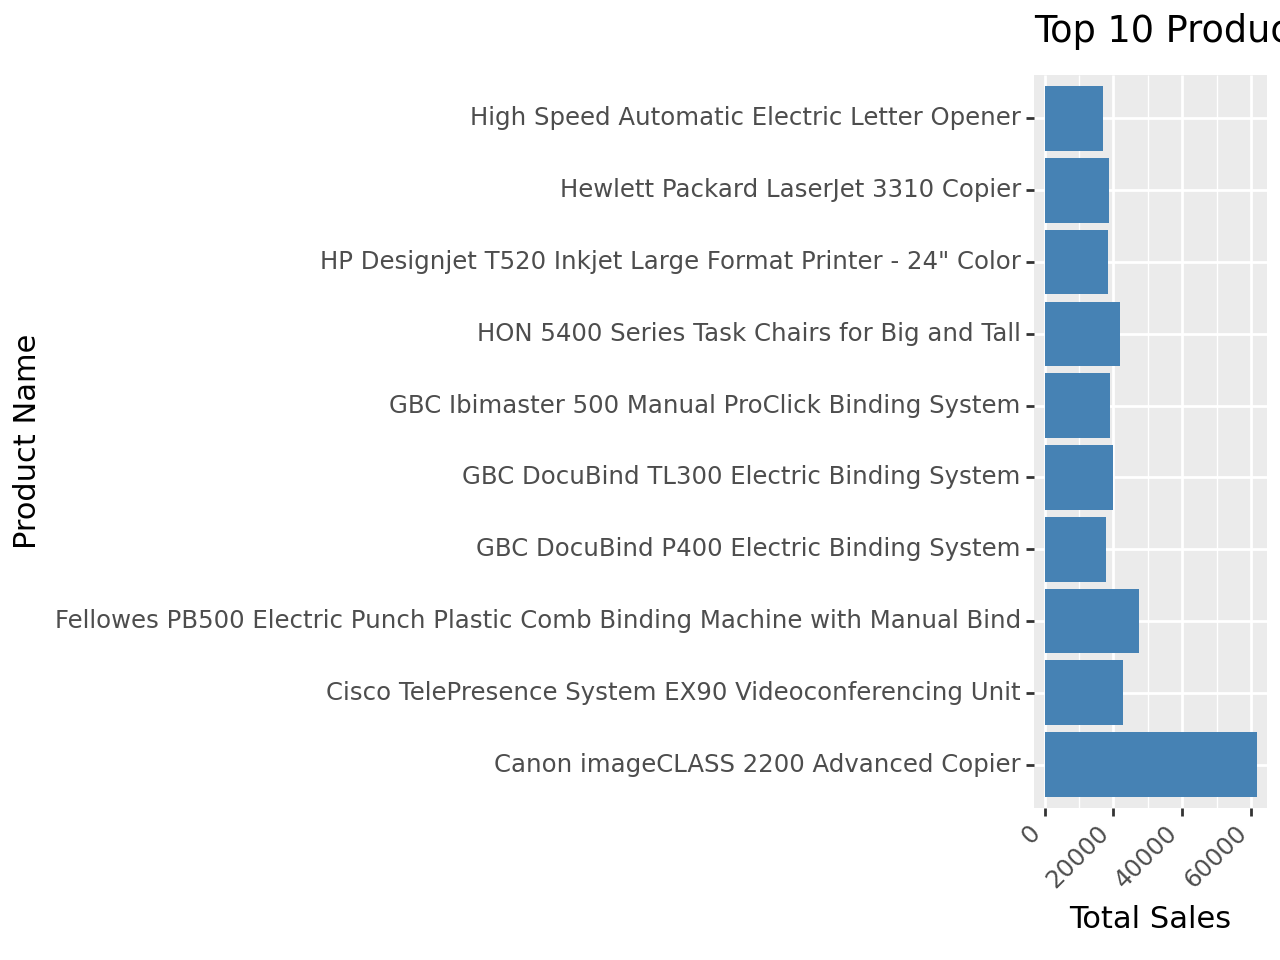

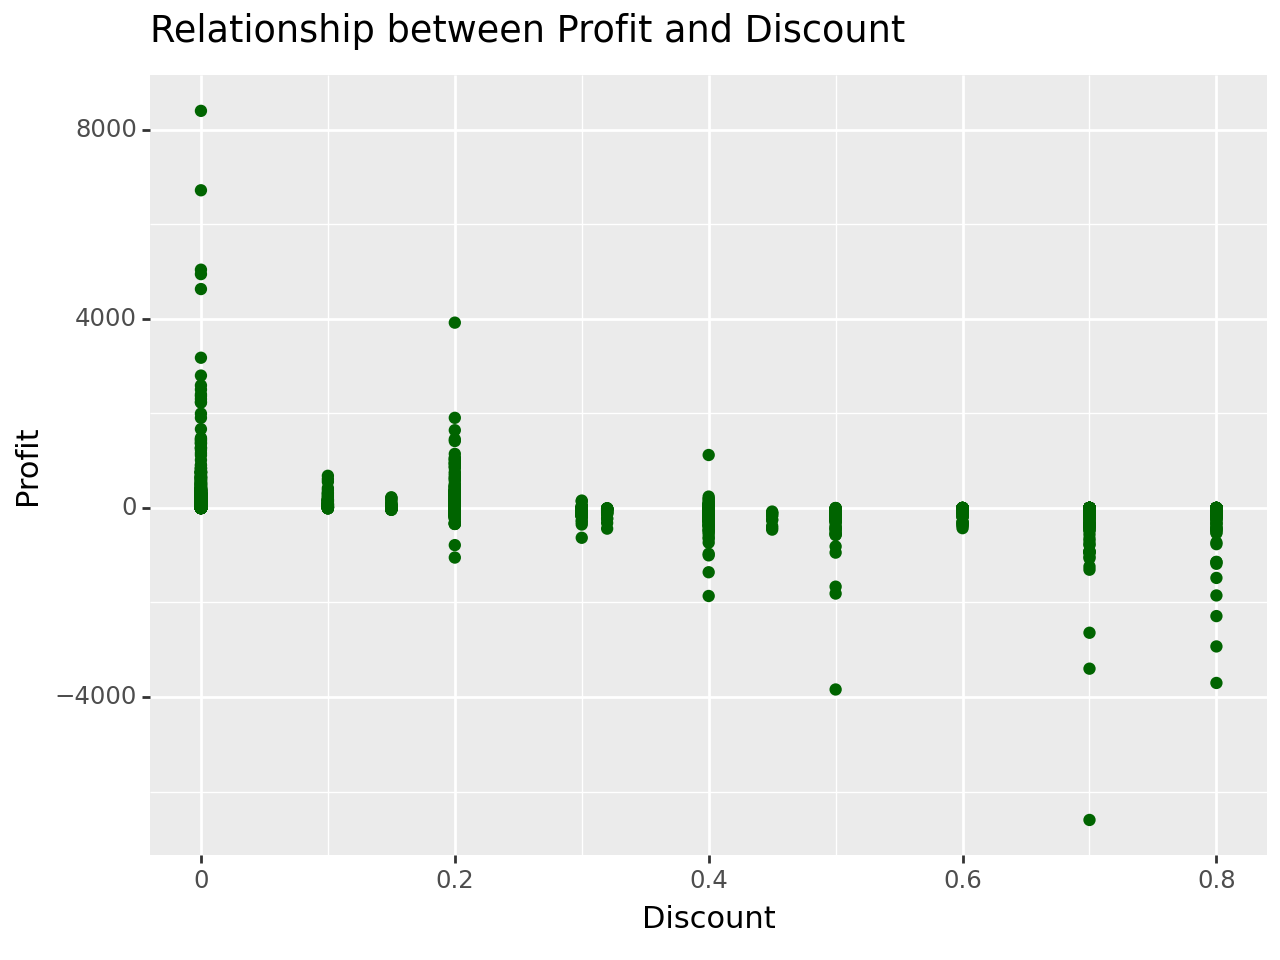

In [27]:
!pip install plotnine
from plotnine import ggplot, aes, geom_bar, geom_point, coord_flip, theme, element_text, labs
import pandas as pd


# Top 10 products by sales
top_10_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

# Bar chart for top 10 products
plot_top10 = (ggplot(top_10_products, aes(x='Product Name', y='Sales'))
 + geom_bar(stat='identity', fill='steelblue')
 + coord_flip()  # Flip coordinates for better readability of product names
 + theme(axis_text_x=element_text(angle=45, hjust=1))  # Rotate x-axis labels
 + labs(title='Top 10 Products by Sales', x='Product Name', y='Total Sales')
)
print(plot_top10)

# Scatter plot for profit vs discount
plot_profit_discount = (ggplot(df, aes(x='Discount', y='Profit'))
 + geom_point(color='darkgreen')
 + labs(title='Relationship between Profit and Discount', x='Discount', y='Profit')
)
print(plot_profit_discount)